In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../')

import os

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [7]:
data = pd.read_csv('../Data/First_model/Making_dataset/data_filter_v2.csv')

So there's actually a shitton of ships with their AIS off!

279


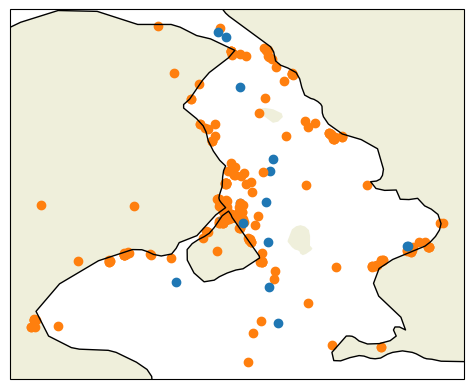

In [67]:
#Plotting everything in the last 30 mins
end = 12 #In hours
index = (data['Time'] < end) & (data['Time'] > end - 0.5)

plot_data = data[index]

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
for MMSI in plot_data['MMSI'].unique():
    ship = plot_data[plot_data['MMSI'] == MMSI]
    #Array is already time-sorted so just plot the last position
    ax.scatter(ship['Longitude'].iloc[-1], ship['Latitude'].iloc[-1], c='C'+str(int(pd.isna(ship['Next cross'].iloc[-1]))), transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
print(len(plot_data['MMSI'].unique()))


It is indeed much better to show only the ones moving towards, but it is still not very good for a quick overview. A lot of manual assesment will need to go into planning work under the bridge (many of the model assesments are bad)

59


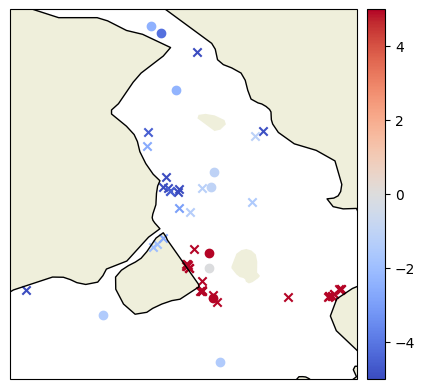

In [74]:
#Plotting everything in the last 30 mins
end = 12 #In hours
index1 = (data['Time'] < end) & (data['Time'] > end - 0.5)

plot_data = data[index1]

#Filtering out ships not moving towards oresundsbroen (and at any case slower than in 10 hours)
estimator = plot_data['Distance'] / plot_data['SOA']
index2 = (estimator < 0) & (estimator > -10) | (plot_data['Distance'].abs() < 5)
plot_data = plot_data[index2]


fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
for MMSI in plot_data['MMSI'].unique():
    ship = plot_data[plot_data['MMSI'] == MMSI]
    #Array is already time-sorted so just plot the last position
    c_try = (ship['Distance']/ship['SOA']).iloc[-1]
    if c_try > 0 or c_try < -10:
        c_try = 10
    
    if pd.isna(ship['Next cross'].iloc[-1]):
        shape = 'x'
    else:
        shape = 'o'
    ax.scatter(ship['Longitude'].iloc[-1], ship['Latitude'].iloc[-1], marker=shape, cmap='coolwarm', c=c_try, vmin = -5, vmax = 5, transform=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)

cbar = plt.colorbar(ax.collections[0], ax=ax, orientation='vertical', pad=0.02)
print(len(plot_data['MMSI'].unique()))

First, I'm testing out how it looks at a given time on the day (how cluttered)
Showing all ships that have been present within the last half hour